Install package pytorch_tabnet, commented after installation to avoid re-running. Uncomment in a new notebook runtime.

In [ ]:
# !pip install pytorch_tabnet

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from google.colab import drive 
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

Mount google drive storage.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Local imports using helper files**

In [ ]:
sys.path.append('/content/drive/MyDrive/MSc-project-lof/')

In [ ]:
from modelling import prepare_training, hparam_grid_search, train_test_result
from modelling import display_confusion_matrix, save_model

Load Training Data

In [ ]:
df_X = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/X_iter5_v4_transformed_ready to train.csv",header=None)

In [ ]:
df_y = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_y_iter5_v2_before smote_transformed_ready to train.csv")

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4740 non-null   float64
 1   1       4740 non-null   float64
 2   2       4740 non-null   float64
 3   3       4740 non-null   float64
 4   4       4740 non-null   float64
 5   5       4740 non-null   float64
 6   6       4740 non-null   float64
 7   7       4740 non-null   float64
 8   8       4740 non-null   float64
 9   9       4740 non-null   float64
 10  10      4740 non-null   float64
 11  11      4740 non-null   float64
 12  12      4740 non-null   float64
 13  13      4740 non-null   float64
 14  14      4740 non-null   float64
 15  15      4740 non-null   float64
 16  16      4740 non-null   float64
dtypes: float64(17)
memory usage: 629.7 KB


Prepare training data

In [ ]:
X_train, X_val, y_train, y_val = prepare_training(df_X, df_y)

In [ ]:
X_train.shape, y_train.shape

((3318, 17), (3318,))

In [ ]:
X_val.shape, y_val.shape

((1422, 17), (1422,))

In [ ]:
class_names = ['LikelyPatho','Pathogenic','Benign']

Lists to save validation accuracies and F1 scores  of the models.

In [ ]:
val_acc = []
f1_list = []

Logistic regression

Training Accuracy:  0.8438818565400844
Validation Accuracy:  0.8382559774964838
F1-Score: 0.8103016757446226


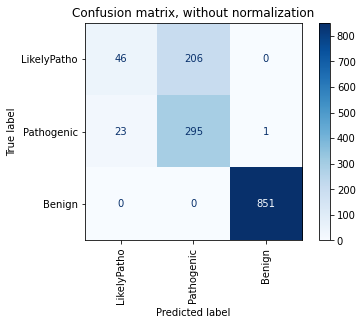

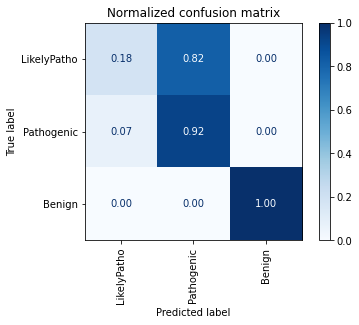

              precision    recall  f1-score   support

           0       0.67      0.18      0.29       252
           1       0.59      0.92      0.72       319
           2       1.00      1.00      1.00       851

    accuracy                           0.84      1422
   macro avg       0.75      0.70      0.67      1422
weighted avg       0.85      0.84      0.81      1422



In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42,C=1e5,max_iter=20000)
acc, f1 = train_test_result(model_lr, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Hyperparameter tuning for Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
param_grid = [{"C":[1,10,100,1000],"gamma" : [0.1,0.01,0.001,0.00001],"kernel":["rbf"]}]
best_params = hparam_grid_search(svm.SVC(), param_grid, X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.840, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.837, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.830, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.836, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.846, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.837, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.834, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.836, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.837, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.837, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   17.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

SVM model

Training Accuracy:  0.9147076552139843
Validation Accuracy:  0.8445850914205345
F1-Score: 0.8398429772515195


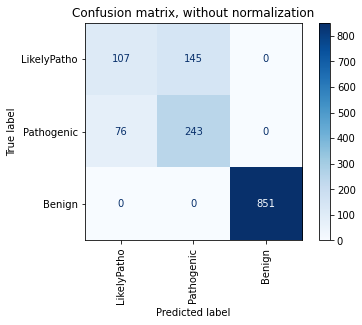

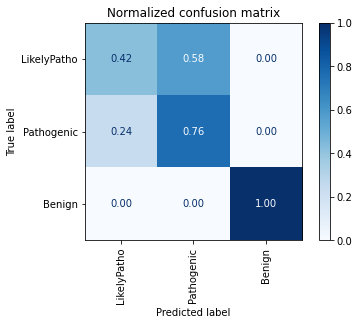

              precision    recall  f1-score   support

           0       0.58      0.42      0.49       252
           1       0.63      0.76      0.69       319
           2       1.00      1.00      1.00       851

    accuracy                           0.84      1422
   macro avg       0.74      0.73      0.73      1422
weighted avg       0.84      0.84      0.84      1422



In [ ]:
model_svm = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True)
acc, f1 = train_test_result(model_svm, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

KNN Model

Training Accuracy:  0.8743218806509946
Validation Accuracy:  0.8396624472573839
F1-Score: 0.8300551593935879


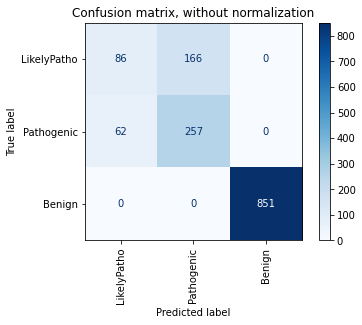

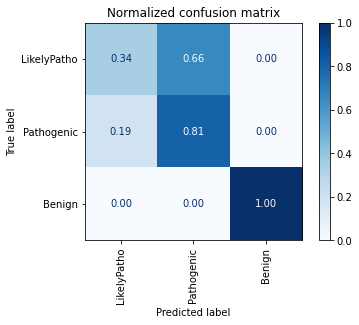

              precision    recall  f1-score   support

           0       0.58      0.34      0.43       252
           1       0.61      0.81      0.69       319
           2       1.00      1.00      1.00       851

    accuracy                           0.84      1422
   macro avg       0.73      0.72      0.71      1422
weighted avg       0.84      0.84      0.83      1422



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=9)
acc, f1 = train_test_result(model_knn, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Gaussian Naive Bayes

Training Accuracy:  0.8306208559373116
Validation Accuracy:  0.8227848101265823
F1-Score: 0.7921374249550662


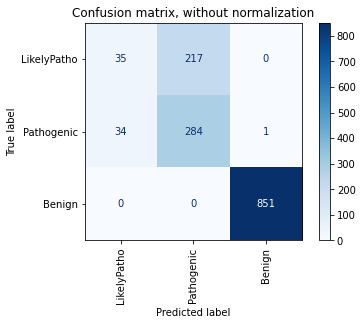

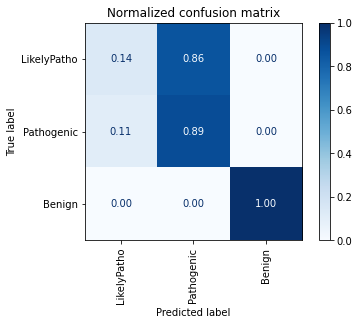

              precision    recall  f1-score   support

           0       0.51      0.14      0.22       252
           1       0.57      0.89      0.69       319
           2       1.00      1.00      1.00       851

    accuracy                           0.82      1422
   macro avg       0.69      0.68      0.64      1422
weighted avg       0.81      0.82      0.79      1422



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB(var_smoothing=0.00001)
acc, f1 = train_test_result(model_nb, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Random Forest Classifier

Training Accuracy:  1.0
Validation Accuracy:  0.8354430379746836
F1-Score: 0.8307585182937403


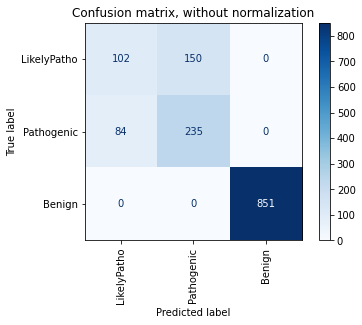

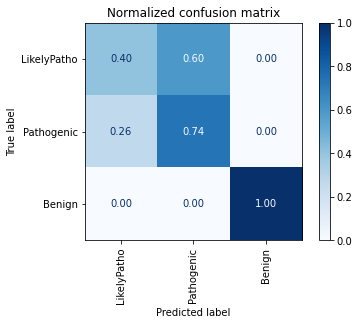

              precision    recall  f1-score   support

           0       0.55      0.40      0.47       252
           1       0.61      0.74      0.67       319
           2       1.00      1.00      1.00       851

    accuracy                           0.84      1422
   macro avg       0.72      0.71      0.71      1422
weighted avg       0.83      0.84      0.83      1422



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=50, random_state=0,n_jobs=-1)
acc, f1 = train_test_result(model_rfc, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Hyper parameter tuning for XGB model. Code has been commneted to avoid re-running as it takes roughly 2 hours on Colab Pro with high RAM. Results have been saved after tuning.

In [ ]:
# from xgboost import XGBClassifier
# param_grid = [{ "max_depth": [30,50,60],
#                 "learning_rate": [0.1, 0.05,0.01],
#                 "gamma": [0.25,0.5, 1],
#                 "reg_lambda": [1,5,7,10],
#                 "scale_pos_weight": [1, 3, 5],
#                 "subsample": [0.7,0.9],
#                 "colsample_bytree": [0.5]
# }]
# xgb_grid = XGBClassifier(objective='multi:softmax',num_class=3)
# best_params = hparam_grid_search(xgb_grid, param_grid, X_train, y_train)


Results:


{'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 30, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 0.7}

In [ ]:
#Copying the resuls to best_params for re-iterations
best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 30, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 0.7}
best_params

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 30,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.7}

XGB model using tuned hyper parameters.

Training Accuracy:  0.8948161543098252
Validation Accuracy:  0.8481012658227848
F1-Score: 0.832556952012876


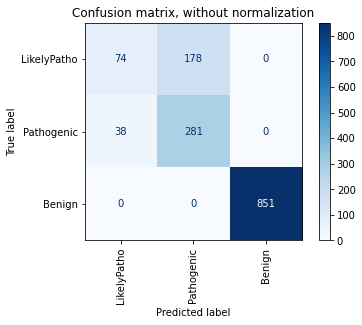

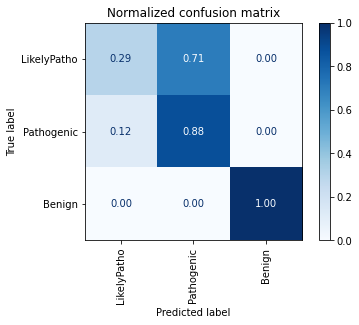

              precision    recall  f1-score   support

           0       0.66      0.29      0.41       252
           1       0.61      0.88      0.72       319
           2       1.00      1.00      1.00       851

    accuracy                           0.85      1422
   macro avg       0.76      0.72      0.71      1422
weighted avg       0.85      0.85      0.83      1422



In [ ]:
model_xgb_tuned = XGBClassifier(
                    colsample_bytree=best_params['colsample_bytree'],
                    gamma = best_params['gamma'],
                    learning_rate = best_params['learning_rate'],
                    max_depth = best_params['max_depth'],
                    reg_lambda = best_params['reg_lambda'],
                    scale_pos_weight = best_params['scale_pos_weight'],
                    subsample = best_params['subsample'],
                    n_jobs = -1
                    )
acc, f1 = train_test_result(model_xgb_tuned, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Tab Net classfier based on deep learning architecture.

In [ ]:
model_tabnet = TabNetClassifier()
acc, f1 = train_test_result(model_tabnet, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Device used : cpu
epoch 0  | loss: 1.28041 | val_0_accuracy: 0.64065 |  0:00:00s
epoch 1  | loss: 1.06346 | val_0_accuracy: 0.62869 |  0:00:00s
epoch 2  | loss: 0.97989 | val_0_accuracy: 0.62096 |  0:00:00s
epoch 3  | loss: 0.85044 | val_0_accuracy: 0.63502 |  0:00:01s
epoch 4  | loss: 0.7386  | val_0_accuracy: 0.64838 |  0:00:01s
epoch 5  | loss: 0.61808 | val_0_accuracy: 0.69972 |  0:00:01s
epoch 6  | loss: 0.51376 | val_0_accuracy: 0.7834  |  0:00:01s
epoch 7  | loss: 0.41665 | val_0_accuracy: 0.80098 |  0:00:02s
epoch 8  | loss: 0.36651 | val_0_accuracy: 0.79817 |  0:00:02s
epoch 9  | loss: 0.31957 | val_0_accuracy: 0.81575 |  0:00:02s
epoch 10 | loss: 0.28603 | val_0_accuracy: 0.81857 |  0:00:02s
epoch 11 | loss: 0.2928  | val_0_accuracy: 0.81857 |  0:00:03s
epoch 12 | loss: 0.28915 | val_0_accuracy: 0.82208 |  0:00:03s
epoch 13 | loss: 0.28102 | val_0_accuracy: 0.82489 |  0:00:03s
epoch 14 | loss: 0.28125 | val_0_accuracy: 0.82419 |  0:00:03s
epoch 15 | loss: 0.27791 | val_0_accu

Plot comparison of validation accuracies and F1 scores.

<Figure size 432x288 with 0 Axes>

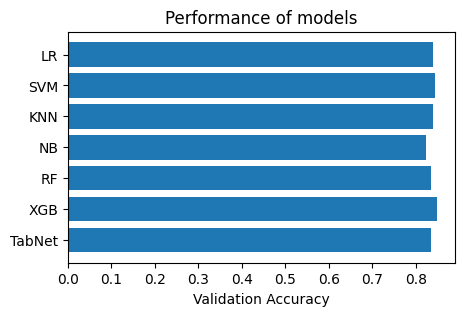

In [ ]:
plt.figure()
plt.rcdefaults()
fig, ax = plt.subplots()

models = ('LR', 'SVM', 'KNN', 'NB', "RF","XGB","TabNet")
y_pos = np.arange(len(models))

fig.set_size_inches(5,3)
ax.barh(y_pos, val_acc, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis() 
ax.set_xlabel('Validation Accuracy')
ax.set_title('Performance of models')

plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

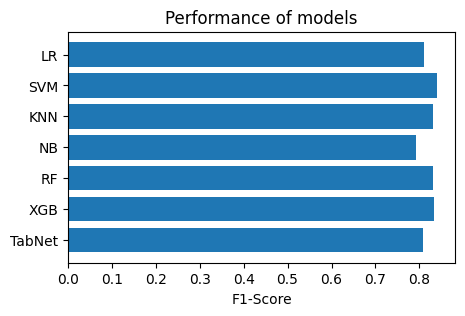

In [ ]:
plt.figure()
plt.rcdefaults()
fig, ax = plt.subplots()

models = ('LR', 'SVM', 'KNN', 'NB', "RF","XGB","TabNet")
y_pos = np.arange(len(models))

fig.set_size_inches(5,3)
ax.barh(y_pos, f1_list, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis() 
ax.set_xlabel('F1-Score')
ax.set_title('Performance of models')

plt.show()
plt.close()

Load Inpdependent Test Set (ITS)

In [ ]:
df_X_test = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_X_test_iter5_v4_PCA_transformed_ready to train.csv",header=None)
df_y_test = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_y_test_iter5_v1_transformed_ready to train.csv")

In [ ]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy().reshape(-1,)
X_test.shape, y_test.shape

((300, 17), (300,))

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

Before testing, train best models (XGB and RFC) on full training data (training set + testing set).

In [ ]:
X_full = np.concatenate((X_train,X_val),axis=0)

In [ ]:
X_full.shape

(4740, 17)

In [ ]:
y_full = np.concatenate((y_train,y_val),axis=0)
y.shape

(4740,)

Training Accuracy:  0.8936708860759494
F1-Score: 0.885690062815401


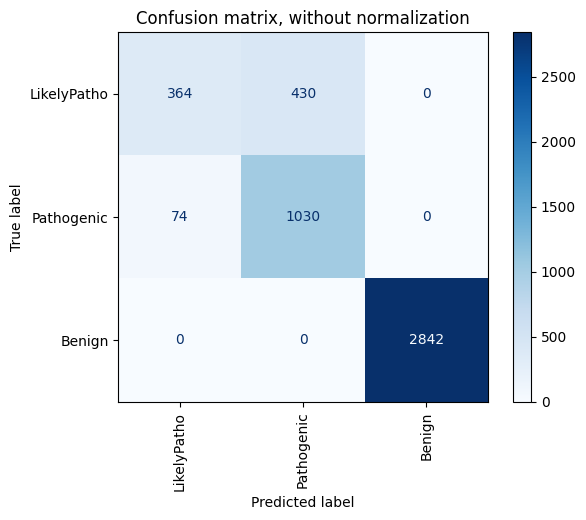

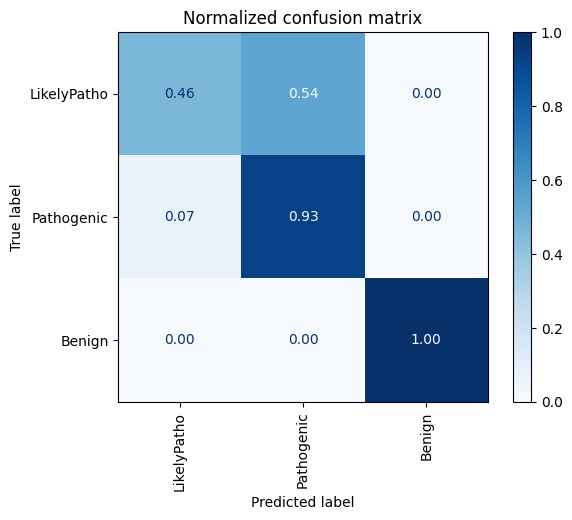

              precision    recall  f1-score   support

           0       0.83      0.46      0.59       794
           1       0.71      0.93      0.80      1104
           2       1.00      1.00      1.00      2842

    accuracy                           0.89      4740
   macro avg       0.85      0.80      0.80      4740
weighted avg       0.90      0.89      0.89      4740



In [ ]:
model_xgb_full = XGBClassifier(
                    colsample_bytree=best_params['colsample_bytree'],
                    gamma = best_params['gamma'],
                    learning_rate = best_params['learning_rate'],
                    max_depth = best_params['max_depth'],
                    reg_lambda = best_params['reg_lambda'],
                    scale_pos_weight = best_params['scale_pos_weight'],
                    subsample = best_params['subsample'],
                    n_jobs = -1
                    )
train_test_result(model_xgb_full, train=True, X_train=X_full, y_train=y_full, class_names=class_names, train_f1=True, train_cm=True, test=False)

Test the XGB model using ITS.

Testing Accuracy:  0.8466666666666667
F1-Score: 0.8134256851294439


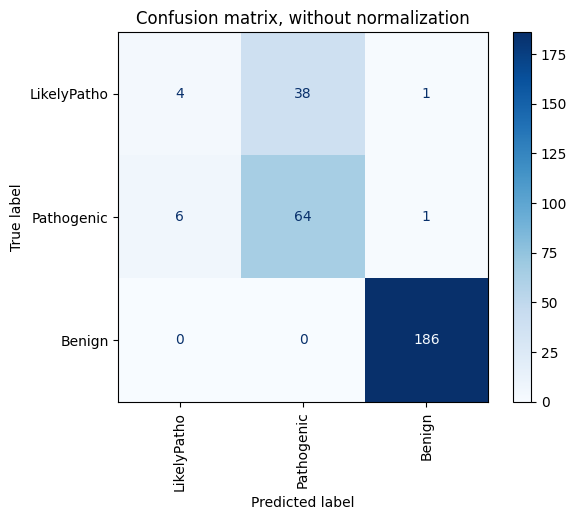

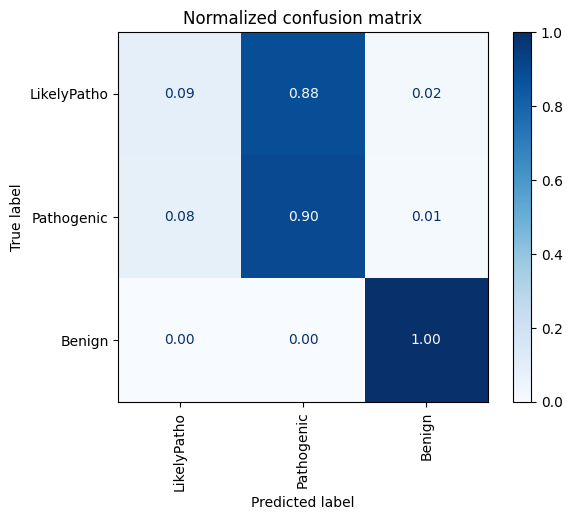

              precision    recall  f1-score   support

           0       0.40      0.09      0.15        43
           1       0.63      0.90      0.74        71
           2       0.99      1.00      0.99       186

    accuracy                           0.85       300
   macro avg       0.67      0.66      0.63       300
weighted avg       0.82      0.85      0.81       300



In [ ]:
train_test_result(model_xgb_full,train=False, X_val=X_test, y_val=y_test, class_names=class_names, test=True, test_ret=False)

Train RFC on full data.

Training Accuracy:  0.950632911392405
F1-Score: 0.9502789432445351


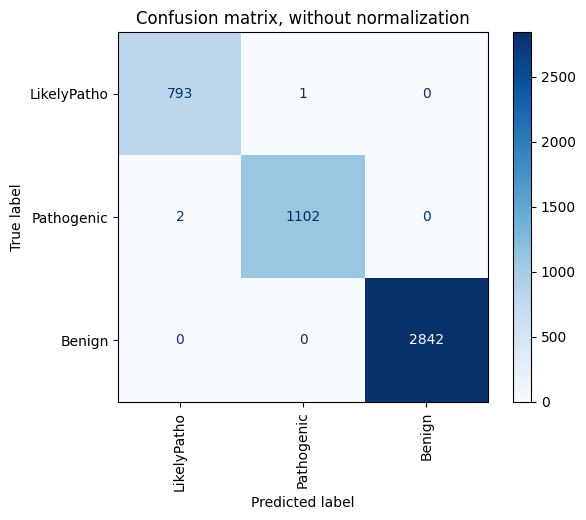

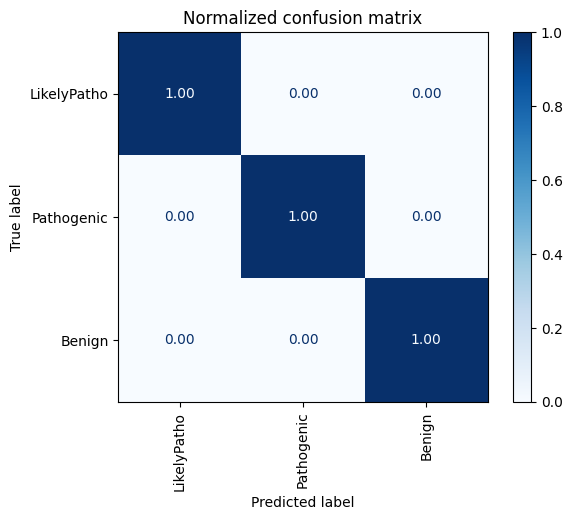

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       794
           1       0.87      0.92      0.90      1104
           2       1.00      1.00      1.00      2842

    accuracy                           0.95      4740
   macro avg       0.92      0.91      0.91      4740
weighted avg       0.95      0.95      0.95      4740



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc_full = RandomForestClassifier(n_estimators=30, random_state=0,n_jobs=-1)
train_test_result(model_rfc_full, train=True, X_train=X_full, y_train=y_full, class_names=class_names, train_f1=True, train_cm=True, test=False)

Test RFC on ITS.

Testing Accuracy:  0.83
F1-Score: 0.829190850915817


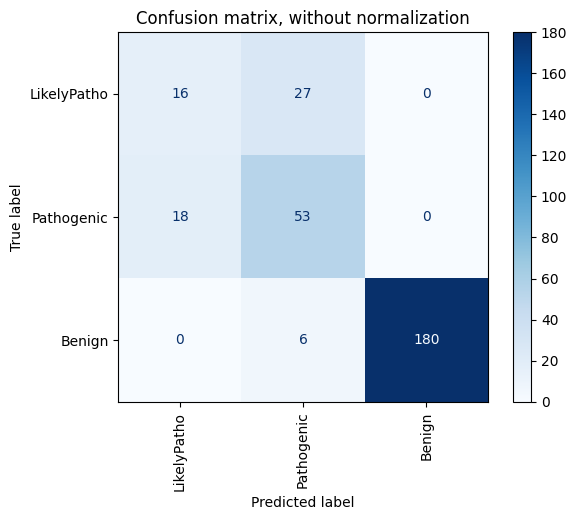

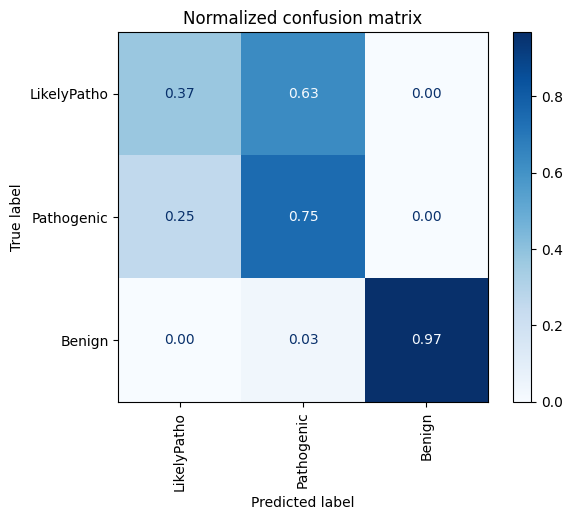

              precision    recall  f1-score   support

           0       0.47      0.37      0.42        43
           1       0.62      0.75      0.68        71
           2       1.00      0.97      0.98       186

    accuracy                           0.83       300
   macro avg       0.70      0.70      0.69       300
weighted avg       0.83      0.83      0.83       300



In [ ]:
train_test_result(model_rfc_full,train=False, X_val=X_test, y_val=y_test, class_names=class_names, test=True, test_ret=False)